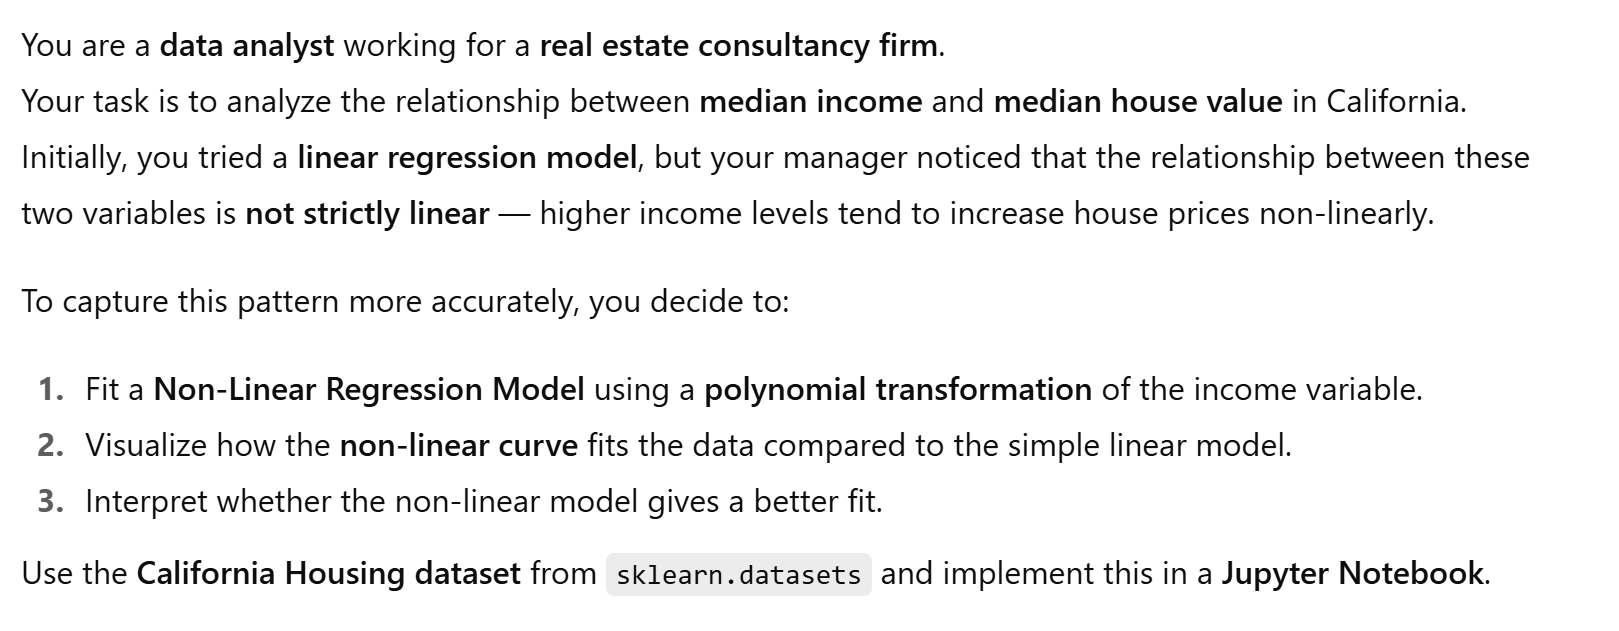

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
# Select one predictor (Median Income) and the target (House Value)
X = df[['MedInc']]
y = df['MedHouseVal']


In [4]:

# Step 2: Fit a simple linear regression model (for comparison)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

In [7]:
# Step 3: Fit a polynomial (non-linear) regression model
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

In [8]:
# Step 4: Evaluate both models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

print("Model Performance Comparison:")
print(f"Linear Model -> MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Polynomial Model (Degree 3) -> MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")


Model Performance Comparison:
Linear Model -> MSE: 0.7011, R²: 0.4734
Polynomial Model (Degree 3) -> MSE: 0.6842, R²: 0.4862


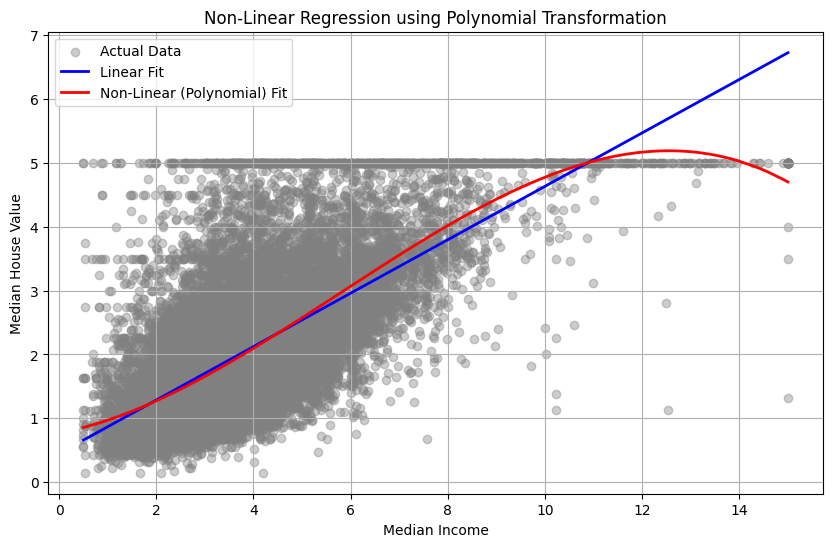

In [9]:
# Step 5: Visualization
plt.figure(figsize=(10,6))

# Sort values for smooth curve plotting
sorted_idx = np.argsort(X.values.flatten())
plt.scatter(X, y, color='gray', alpha=0.4, label='Actual Data')
plt.plot(X.values[sorted_idx], y_pred_linear[sorted_idx], color='blue', linewidth=2, label='Linear Fit')
plt.plot(X.values[sorted_idx], y_pred_poly[sorted_idx], color='red', linewidth=2, label='Non-Linear (Polynomial) Fit')

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Non-Linear Regression using Polynomial Transformation")
plt.legend()
plt.grid(True)
plt.show()

Non-linear regression helps model relationships where changes in predictors don’t have a constant effect on the response.

Here, we used Polynomial Regression (a type of non-linear regression) to fit a curved relationship.

Comparing R² and MSE helps determine whether the non-linear model improves prediction accuracy.